In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL as pl
import math
import random

In [2]:
img_1 = pl.Image.open('Images/1.png') # Store the folder Images containing the four test images in the same folder as the .ipynb file
img_2 = pl.Image.open('Images/2.png') # If you directly store the images in the folder, remove 'Images/' part from the path
img_3 = pl.Image.open('Images/3.png')
img_4 = pl.Image.open('Images/4.png')

img_array_1 = np.array(img_1)
img_array_2 = np.array(img_2)
img_array_3 = np.array(img_3)
img_array_4 = np.array(img_4)

Our **objective** in this task is to cluster/group the white data points into different clusters and find the centroids of said clusters to find the distances between the different cities.

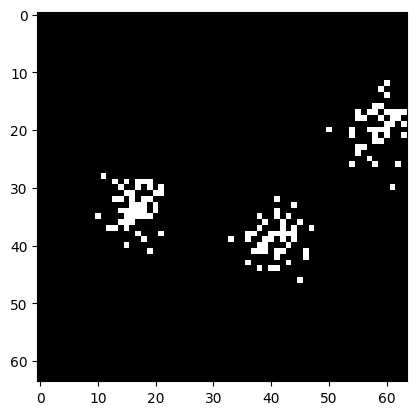

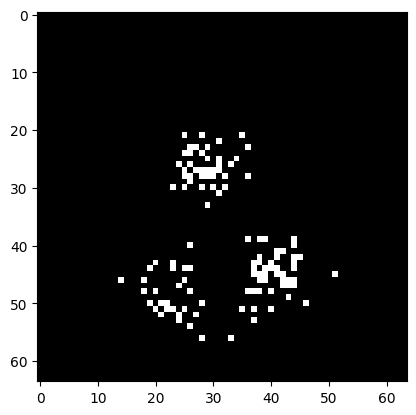

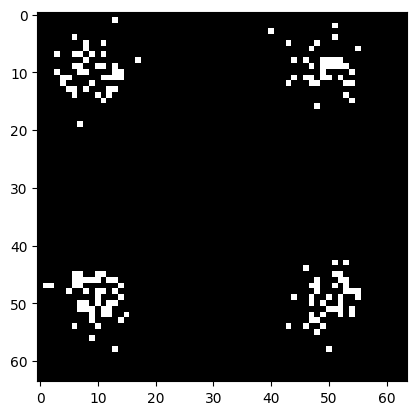

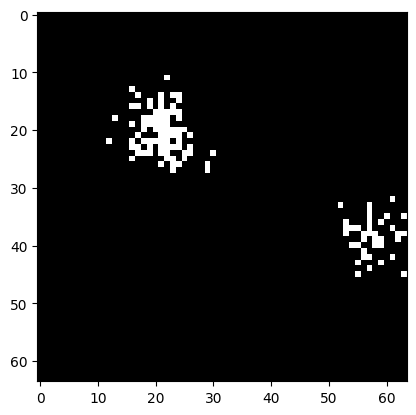

In [3]:
plt.imshow(img_array_1)
plt.show()
plt.imshow(img_array_2)
plt.show()
plt.imshow(img_array_3)
plt.show()
plt.imshow(img_array_4)
plt.show()

In order to cluster the data, I will be using the **K-means clustering**, to group the data. The basic working of this algorithm is as follows.
The k in K-means is a placeholder for the number of groups we would want to divide it into, this is be 2, 3 or any number of groups.

>For this explanation, I will work with the example of k = 3

From all valid points in the above images (the white pixels representing lights of a city), we will pick out three random points, and take them as our centroids. Then we will individually take each valid point and find the centroid to which it is closest to (this is donte by taking the pythagorean distance between the centroids and picking the shortest distance) and assign it to the group of that centroid.

> Now, we should have three groups, which will probably not be properly distributed

After that, we recalculate the centroids using the valid points in each group (we take the centroids from all the points in a group), and reapply thr above steps to reassign the groups.

This loop of recalcuting the centriods and reassigning valid points continues till, the centriod stabalizes at a point and stops changing. This means that the group has stabilized and is likely to be grouped together.

![Random points](https://i.imgur.com/LapyB5O.png)   
### These are random points on a scatter plot
![centroid distance](https://i.imgur.com/5kHPFvY.png)   
### Now, we take three random points as our centroid and find the shortest distances from centroids for all the points
![New centroid](https://i.imgur.com/Q31jLO2.png) 
### After assigning all the points, we take the new centroid of the points and repeat the process all over again using the new centroids
![Final Groups](https://i.imgur.com/jknfnH0.png) 
### This is done till the centroids stabilize at a point and stop moving, thereby fixing the groups.

In [4]:
def pythag(x:list, y:list):
    return math.sqrt(((x[0] - y[0])**2) + ((x[1] - y[1])**2))

In [5]:
def valid_point (ia):
    v = []
    for i in range(64):
        for j in range(64):
            if ia[i, j][0] == 255:
                v.append([i, j])
    return v

In [6]:
def n_centroids(v:list, k:int):
    c = []
    while len(c) < k:
        x = random.choice(range(len(v)))
        if v[x] not in c:
            c.append(v[x])
    return c

In [7]:
def sd(x:list, c:list): #shortest distance from centroids
    d = 10000 #arbitrarily large number
    point = []
    for i in c:
        distance = pythag(x, i)
        if distance < d:
            d = distance
            point = i
    return point

In [8]:
def new_centroid_finder(v, clusterer, k):
    l = [] 
    counter = []
    for i in range(k):
        l.append([0,0])
        counter.append(0)
    for i in range(len(v)):
        counter[clusterer[i]] += 1
        l[clusterer[i]][0] += v[i][0]
        l[clusterer[i]][1] += v[i][1]
    for i in range(len(l)):
        if counter[i] != 0:
            l[i][0] = round(l[i][0] / counter[i]) 
            l[i][1] = round(l[i][1] / counter[i])
        else:
            while True:
                x = random.choice(range(len(v)))
                if v[x] not in l:
                    l[i] = v[x]
                    break
    return l

In [9]:
def k_cluster(ia, k):
    clusterer = []
    v = valid_point(ia)
    c = n_centroids(v, k)
    for i in v:
        closest = sd(i, c)
        clusterer.append(c.index(closest))

    while True:
        c_new = new_centroid_finder(v, clusterer, k)
        if c_new == c:
            break
        c = c_new
        clusterer = []
        for i in v:
            closest = sd(i, c_new)
            clusterer.append(c_new.index(closest))
    return clusterer

The variance is a measure of the efficiency of the grouping and the lower the variance means there is letter deviation in position among the groups.
the variance is calculated using the standard formula:

![Tux, the Linux mascot](https://images.ctfassets.net/pdf29us7flmy/4UEXUFiVFUgsNA9fZOOQf2/b9e09d7447df4f0253a145ad853eb883/resized.png?w=720&q=100&fm=jpg)

And then the total variance is the sum of the variance of all the groups.

In [10]:
def variance (ia, clusterer, k):
    v = valid_point(ia)
    c = new_centroid_finder(v, clusterer, k)
    total_sum = 0
    sum = [0] * len(c)
    counter = [0] * len(c)
    for i in range(len(v)):
        counter[clusterer[i]] += 1
        sum[clusterer[i]] += (pythag(v[i], c[clusterer[i]]) ** 2)
    for i in range(len(c)):
        total_sum += (sum[i] / counter[i])
    return total_sum

It cannot be guaranteed that the group formed after stabilizing is the right one and that it is not just a low probability mistake. SO to verify our results, it is recommended to repeat the clustering a few times and take the results which has the lowest variance among them.

For the sake of this project, I will **arbitrarily fix a number of ten**. So, I will be performing the clustering algorithm 10 times and the one with the lowest variance will be fixed as the final groups.

In [11]:
def final_group_k_cluster (ia, k):
    best_var = 10000000 #arbitrarily large number
    for i in range(10):
        clusterer = k_cluster (ia, k)
        var = variance (ia, clusterer, k)
        if var < best_var:
            best_var = var
            final_clusterer = clusterer
    return final_clusterer    

Using our eye, we will be able to see that the first image can be clearly divided into 3 groups, so on taking a value of k = 3, we can get a scatter plot of the image (img_array_1).

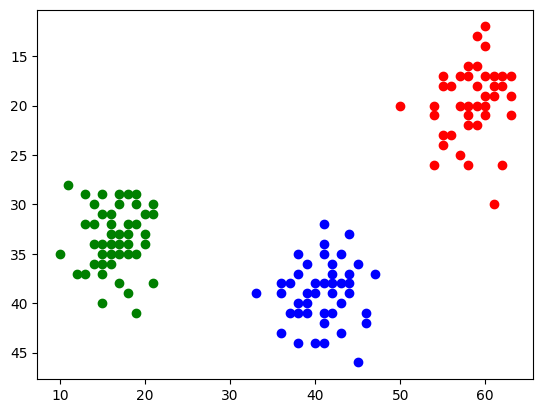

CPU times: total: 93.8 ms
Wall time: 230 ms


In [12]:
%%time
v = valid_point(img_array_1)
final = final_group_k_cluster (img_array_1, 3)
l = [[], [], [], [], [], []]
for i in range(len(v)):
    l[final[i]].append(v[i][0])
    l[final[i]+3].append(v[i][1])

plt.scatter(l[3], l[0], color = 'red')
plt.scatter(l[4], l[1], color = 'blue')
plt.scatter(l[5], l[2], color = 'green')
plt.gca().invert_yaxis()
plt.show()

But there should be a better way to compute the most optimal number of groups that should be formed without the use of eye.
This is where the concept of **elbowing** comes into play. Here we plot a line graph of **variance(k) vs k**, and take the point as the optimal value at which the **'elbow' of the plot bends**.

For example:

![elbow plot](https://i.imgur.com/hC6V7Qz.png)

In the above example, we can see that the plot is elbowing at k = 3, so we can say that the most ideal number of groups will be 3.
So, let us now make a function to compute the 'elbowing' point of the img

We can plot the graph for all possible values of k (all valid points), but that will be pointless for our present data and will only make program runtime slower, so I will fix the **max group number to 10** and plot the graph for **1 to 10**.

The **WCSS** (within-cluster sum of squares) invoves taking the sum of squares of the distance of points from the centroids of their group and adding them up. As one can imagine, the values obtained through WCSS will be extremely large (running into the tems of thousands), and so it is not feasible to perform proper angular calculations of the elbow graph using these values.

So, I have decided to use the **Distortion** instead, which involves dividing the WCSS by the total number of points in the group. I have further divided it by a value of 20 to maintain comparable values between the x and y-axis for calculation purposes as you will see in the case below.

I will print the original WCSS value for comparison to the values we will be using.

In [13]:
def distortion(ia, clusterer, k):
    v = valid_point(ia)
    c = new_centroid_finder(v, clusterer, k)
    total_sum = 0
    part_sum = [0] * len(c)
    counter = [0] * len(c)
    for i in range(len(v)):
        counter[clusterer[i]] += 1
        part_sum[clusterer[i]] += (pythag(v[i], c[clusterer[i]]) ** 2)
    return (sum(part_sum)/(20*len(v))) #dividing by and extra 20 so that the values obtained for WCSS are comparable to those of k (no. of groups)

In [14]:
#the WCSS data for the first image is as follows
v = valid_point(img_array_1)
dis_list = []
for k in range(10):
    clusterer = final_group_k_cluster (img_array_1, k+1)
    dis_list.append(distortion(img_array_1, clusterer, k+1))
    print(k+1, '-', round(dis_list[k]*20*len(v)))

1 - 48934
2 - 16345
3 - 2503
4 - 2165
5 - 2040
6 - 1956
7 - 1527
8 - 1593
9 - 1472
10 - 1328


In [15]:
def getAngle(a, b, c):
    x = (180 + math.degrees(math.atan(b-a)) - math.degrees(math.atan(c-b)))
    if (x < 180): 
        return x 
    else:
        return (360-x)

In [16]:
def elbow_calc_and_plot (ia):
    v = valid_point(ia)
    dis_list = []
    k_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    for k in k_list:
        clusterer = final_group_k_cluster (ia, k)
        dis_list.append(distortion(ia, clusterer, k))
    plt.plot(k_list, dis_list)
    plt.xlabel("Values of k")
    plt.ylabel("Variance of groups at k")
    plt.show()
    slope_dif = 100000
    for k in range(1, (len(k_list)-1)):
        x = getAngle(dis_list[k-1], dis_list[k], dis_list[k+1])
        if x < slope_dif:
            slope_dif = x
            ideal = k_list[k]
    return ideal

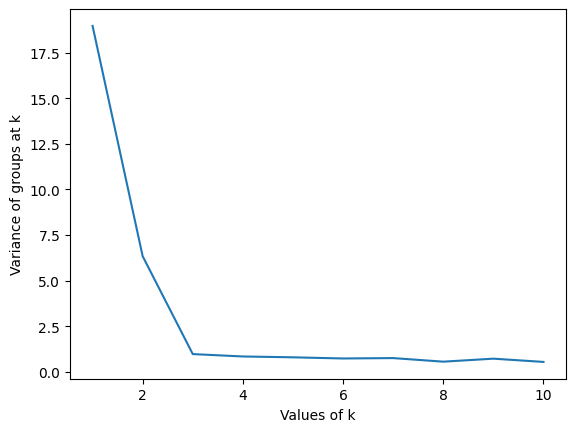

The ideal value is 3

CPU times: total: 578 ms
Wall time: 1.45 s


In [17]:
%%time
ideal = elbow_calc_and_plot (img_array_1)
print(f"The ideal value is {ideal}\n")

Here we can confirm by eye that the optimal result we have computed is accurate and equal to the elbowing point of the graph. Now, we can plot the graph for this value.

In [18]:
def city_distance (k, c):
    dict = {}
    for i in range(k):
        for j in range(i+1, k):
            dict[f"city {i} and city {j}"] = pythag(c[i], c[j])
    return dict

In [19]:
def grouped_plotter(ia, k):
    v = valid_point(ia)
    final = final_group_k_cluster (ia, k)
    c = new_centroid_finder (v, final, k)
    dict = city_distance (k, c)
    l = []
    color = ['red', 'green', 'blue', 'yellow', 'cyan', 'magenta']
    for i in range(k):
        l.append([])
        l.append([])
    for i in range(len(v)):
        l[final[i]].append(v[i][0])
        l[final[i]+k].append(v[i][1])
    for i in range(k):
        plt.scatter(l[i+k], l[i], color = color[i], label = f"City {i}")
    plt.gca().invert_yaxis()
    for i in range(k):
        plt.scatter(c[i][1], c[i][0], color = 'black', marker = 'x')
    plt.legend()
    plt.show()
    df = pd.DataFrame(dict.values(), dict.keys(), columns = ['Distance'])
    print(df)

Now that we have created all the necessary funtions, let us represent all the 4 images and their grouped data together.

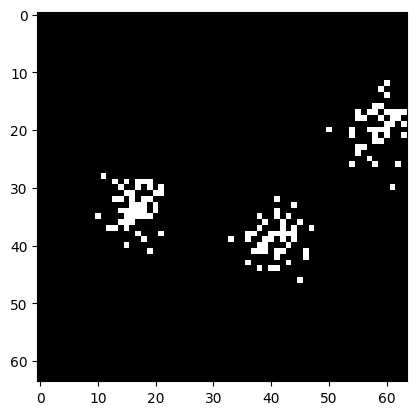

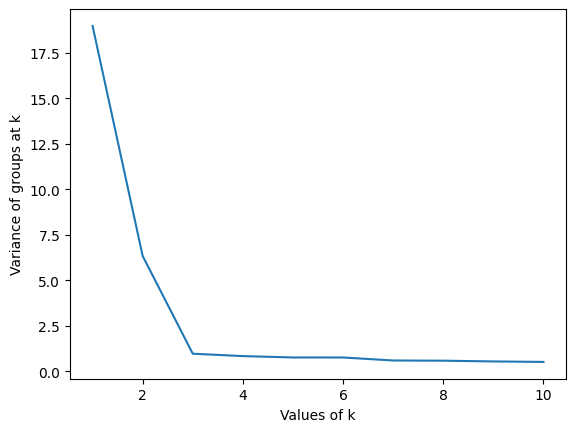

The Ideal number of groups is 3


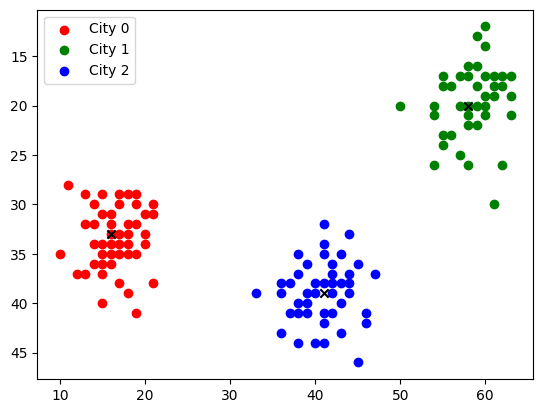

                    Distance
city 0 and city 1  43.965896
city 0 and city 2  25.709920
city 1 and city 2  25.495098


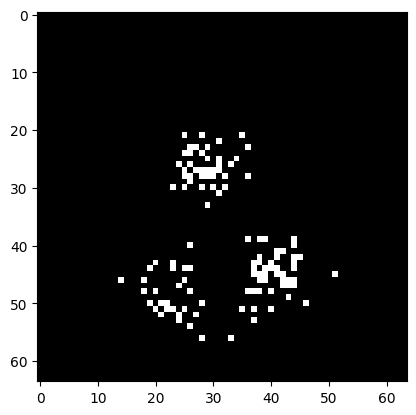

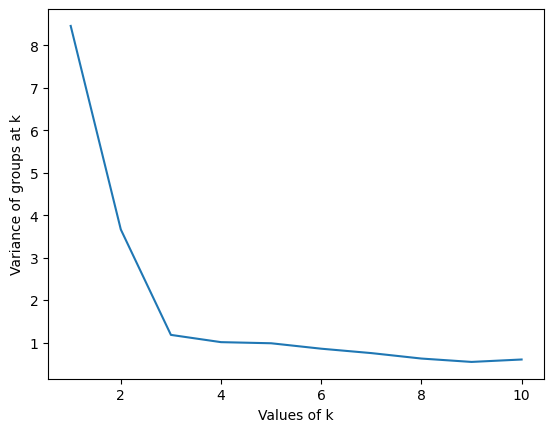

The Ideal number of groups is 3


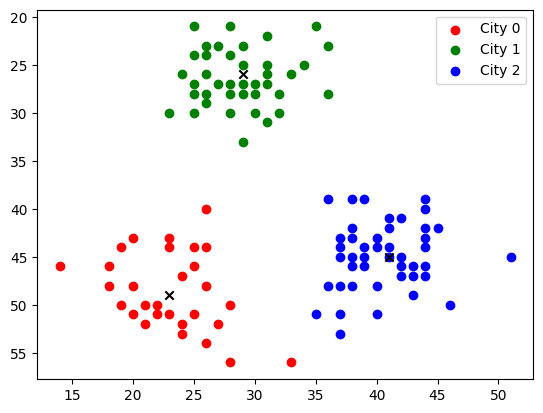

                    Distance
city 0 and city 1  23.769729
city 0 and city 2  18.439089
city 1 and city 2  22.472205


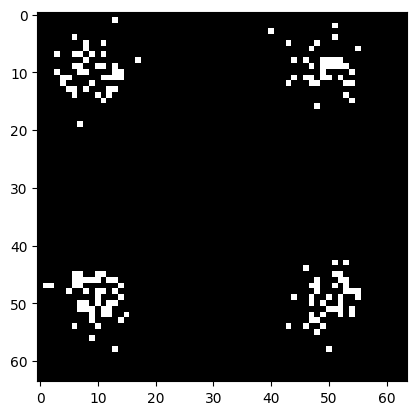

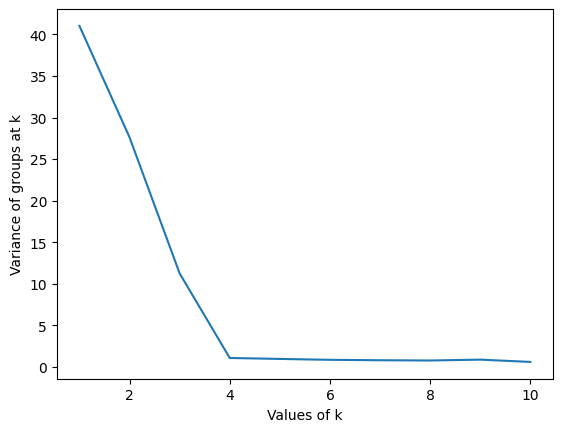

The Ideal number of groups is 4


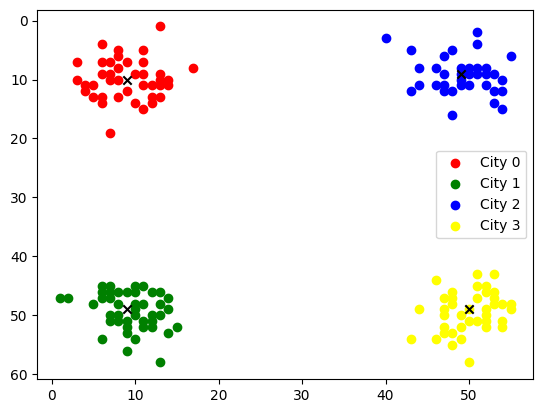

                    Distance
city 0 and city 1  39.000000
city 0 and city 2  40.012498
city 0 and city 3  56.586217
city 1 and city 2  56.568542
city 1 and city 3  41.000000
city 2 and city 3  40.012498


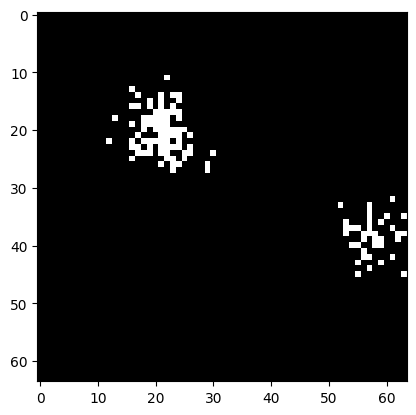

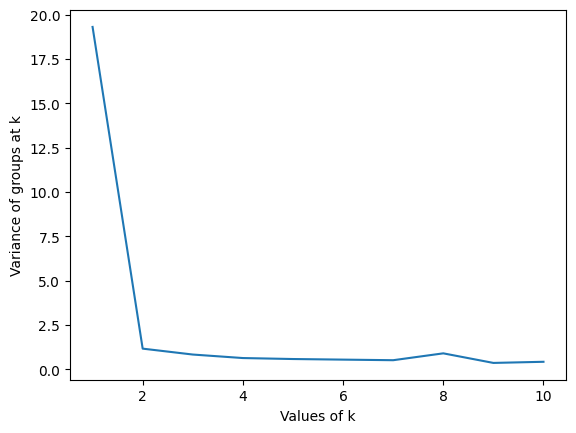

The Ideal number of groups is 2


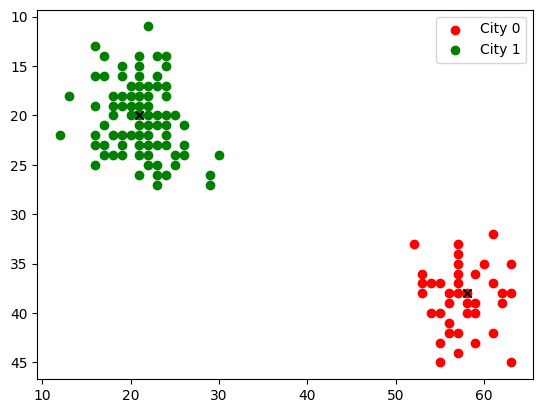

                    Distance
city 0 and city 1  41.146081


CPU times: total: 2.38 s
Wall time: 7.1 s


In [20]:
%%time
plt.imshow(img_array_1)
plt.show()
index1 = elbow_calc_and_plot(img_array_1)
print(f"The Ideal number of groups is {index1}")
grouped_plotter(img_array_1, index1)

plt.imshow(img_array_2)
plt.show()
index2 = elbow_calc_and_plot(img_array_2)
print(f"The Ideal number of groups is {index2}")
grouped_plotter(img_array_2, index2)

plt.imshow(img_array_3)
plt.show()
index3 = elbow_calc_and_plot(img_array_3)
print(f"The Ideal number of groups is {index3}")
grouped_plotter(img_array_3, index3)

plt.imshow(img_array_4)
plt.show()
index4 = elbow_calc_and_plot(img_array_4)
print(f"The Ideal number of groups is {index4}")
grouped_plotter(img_array_4, index4)
print('\n')